In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pywt
from PIL import Image, ImageOps
from structured_random_features.src.models.weights import V1_weights
from sklearn.linear_model import Lasso
from src.V1_reconst import reconstruct
import pandas as pd

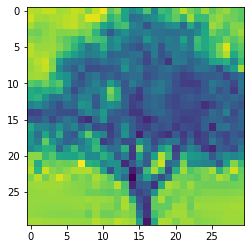

In [22]:
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img_arr)

In [23]:
# Wavelet Decomposition Lv 2
#lv = 2
w = 'db2'
coeffs = pywt.dwt2(img, wavelet = w)
LL, (LH, HL, HH) = coeffs
reconst = pywt.idwt2(coeffs, w)

In [24]:
coeffs[2]

IndexError: tuple index out of range

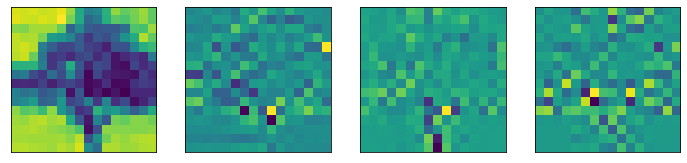

In [25]:
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a)
    ax.set_xticks([])
    ax.set_yticks([])

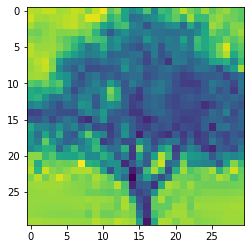

In [26]:
plt.imshow(reconst)

In [27]:
wavedecn(img, 'db2')

[array([[1699.25971997, 1688.54206917, 1726.76101324, 1135.08927787,
         1467.41092086, 1491.64605185],
        [1682.07590523, 1672.65996792, 1747.07794705, 1104.3562386 ,
         1466.24296739, 1548.46938153],
        [1628.3490303 , 1655.16158241, 1032.44084673,  730.51209522,
          850.72901556, 1189.72721359],
        [ 903.11860301,  894.09079652,  788.93460059,  630.76250022,
          498.90221191,  575.73833604],
        [1518.36181915, 1520.16186735, 1467.11236983,  954.70050473,
         1303.86948393, 1363.93676435],
        [1646.60777541, 1645.91720712, 1690.81138938, 1245.60761927,
         1646.71723301, 1670.84460414]]),
 {'ad': array([[ 3.84494412e+00, -2.72743551e+01,  6.83794348e+00,
           4.80987401e+01,  4.45691824e+00,  2.83698772e+01],
         [ 6.43254086e+00, -1.38528988e+01, -2.19145256e+00,
           1.64949767e+01,  1.87915269e+01,  4.51409503e+01],
         [-1.53637559e+01,  4.92209765e+01, -1.19925045e+01,
          -9.38734957e+01,  9.0

In [28]:
from pywt import wavedecn

coeffs = wavedecn(np.ones((10,4,4)), 'db2')

In [29]:
coeffs

[array([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
 

In [30]:
n, m = img_arr.shape
samp = np.floor(n * m * 0.5).astype(int)
rand_index = np.random.randint(0, n * m, samp)
y = img_arr.flatten()[rand_index].reshape(samp, 1)

y = y * np.sqrt(n * m)
C = np.eye(n * m)[rand_index, :] * np.sqrt(n * m)
C3D = C.reshape(samp, n, m)

In [41]:
theta = pywt.wavedecn(C3D, wavelet = w, axes = [1,2])

In [52]:
theta_rav = pywt.ravel_coeffs(theta, axes = [1, 2])[0]
theta_rav = theta_rav.reshape((450, 1155))
# theta_rav.reshape((samp, len(theta_rav) // samp))

theta_rav

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.02124051, -0.13001432],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.21657143],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [47]:
519750 / 450

1155.0

In [ ]:
theta[0]

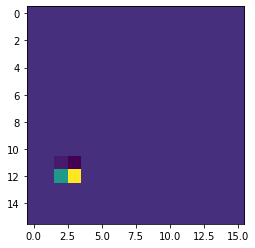

In [19]:
plt.imshow(theta[0][0])

In [33]:
# TODO: do one run of dwt to find the array size, slice, and shape since slice and shape would be same throughout.
# the, use theta to have all theta ravled around sample size. Fit LASSO with raveled theta and y --> Unravel and reform
# BUt isn't sparse vector going to be 450 X 1?? How would we unravel it?

pywt.wavedecn(C3D[0], wavelet = w)

theta = []

for i in range(samp):
    theta_i = pywt.wavedecn(C3D[i], wavelet= w)
    theta[i, :] = pywt.ravel_coeffs(theta_i)

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

In [34]:
t = pywt.wavedecn(C3D[100], wavelet = w)
t_rav = pywt.ravel_coeffs(t)

In [40]:
t

[array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.01346594, -0.34160901, -0.40412779,
          0.10828572],
        [ 0.        ,  0.        , -0.08242578,  2.09100782,  2.47368881,
         -0.66282292],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]]),
 {'ad': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0.        ,  0.        ,  0.05025558, -0.65869159,  0.10828572,
           0.40412779],
         [ 0.        ,  0.        , -0.30761719,  4.03188804, -0.66282292,
          -2.47368881],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0. 

In [35]:
t_rav

(array([0., 0., 0., ..., 0., 0., 0.]),
 [slice(None, 36, None),
  {'ad': slice(36, 72, None),
   'da': slice(72, 108, None),
   'dd': slice(108, 144, None)},
  {'ad': slice(144, 225, None),
   'da': slice(225, 306, None),
   'dd': slice(306, 387, None)},
  {'ad': slice(387, 643, None),
   'da': slice(643, 899, None),
   'dd': slice(899, 1155, None)}],
 [(6, 6),
  {'ad': (6, 6), 'da': (6, 6), 'dd': (6, 6)},
  {'ad': (9, 9), 'da': (9, 9), 'dd': (9, 9)},
  {'ad': (16, 16), 'da': (16, 16), 'dd': (16, 16)}])

In [36]:
t_rav[0].shape

(1155,)

In [8]:
pywt.coeffs_to_array(t)[0].shape

NameError: name 't' is not defined

In [9]:
t_rav

NameError: name 't_rav' is not defined